In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


## power spectrum class

In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [4]:
%%time
power_b1.init_pklin(3.0)

CPU times: user 15.5 ms, sys: 156 µs, total: 15.7 ms
Wall time: 15.5 ms


In [5]:
%%time
power_b1.init_pkhalo()

CPU times: user 309 ms, sys: 0 ns, total: 309 ms
Wall time: 309 ms


In [6]:
%%time
k = np.logspace(-5.0, 3, 100)
pkhalo = power_b1.get_pkhalo_kz(k, 0.1)
pklin  = power_b1.get_pklin_kz(k, 0.1)

CPU times: user 2.45 ms, sys: 0 ns, total: 2.45 ms
Wall time: 2.37 ms


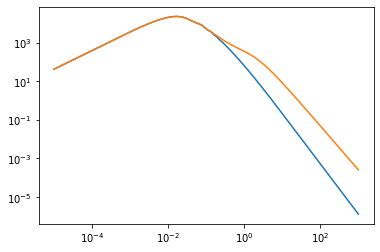

In [7]:
plt.figure()
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e2,1e6)
plt.plot(k, pklin)
plt.plot(k, pkhalo)
plt.show()

$P\left(\frac{l}{\chi}, z(\chi)\right)$

In [8]:
l = 2e3
chimin, chimax = power_b1.z2chi(1e-4), power_b1.z2chi(3)
chi = np.logspace(np.log10(chimin), np.log10(chimax), 50)

In [9]:
%%time
pklin_lz = power_b1.get_pklin_lchi(l, chi)

CPU times: user 2.16 ms, sys: 74 µs, total: 2.23 ms
Wall time: 2.09 ms


In [10]:
%%time
pkhalo_lz = power_b1.get_pkhalo_lchi(l, chi)

CPU times: user 12.1 ms, sys: 973 µs, total: 13 ms
Wall time: 12.5 ms


In [11]:
%%time
pkhalogm_lz = power_b1.get_pkhalogm_lchi(l, chi, 4.0)

CPU times: user 12.8 ms, sys: 0 ns, total: 12.8 ms
Wall time: 12.4 ms


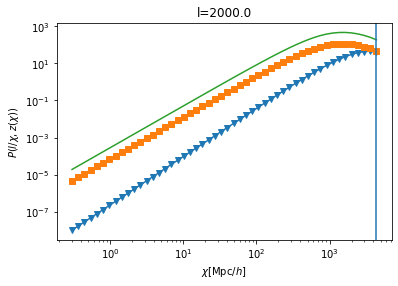

In [12]:
plt.figure()
plt.xlabel(r'$\chi[{\rm Mpc}/h]$')
plt.ylabel(r'$P\left(l/\chi, z(\chi)\right)$')
plt.title(f'l={l}')
plt.loglog(chi, pklin_lz, marker='v')
plt.loglog(chi, pkhalo_lz, marker='s')
plt.loglog(chi, pkhalogm_lz)#, marker='o')
plt.axvline(power_b1.chi_max)
plt.show()

## galaxy sample classes

In [13]:
g_l1 = hsc3x2pt.galaxy_sample_lens_class(['lowz'  , 0.251, 0.15, 0.35, 1.78, '40.36 arcmin^-2', 2.259])
g_l2 = hsc3x2pt.galaxy_sample_lens_class(['cmass1', 0.484, 0.47, 0.55, 2.10, '20.06 arcmin^-2', 3.563])
g_l3 = hsc3x2pt.galaxy_sample_lens_class(['cmass2', 0.617, 0.55, 0.70, 2.28, '30.12 arcmin^-2', 3.729])

g_s1 = hsc3x2pt.galaxy_sample_source_class(['s1' , 1.0, 0.2, '4.37 arcmin^-2'])
g_s2 = hsc3x2pt.galaxy_sample_source_class(['s2' , 1.4, 0.2, '4.37 arcmin^-2'])
g_s12= hsc3x2pt.galaxy_sample_source_class(['s12', 1.2, 0.2, '8.74 arcmin^-2'])

In [14]:
cosmo_dict = power_b1.get_cosmo_dict()
g_l1.set_cosmology_from_dict(cosmo_dict)
g_s1.set_cosmology_from_dict(cosmo_dict)

chirange1 = g_l1.window_galaxy_chirange()
chirange2 = g_s1.window_lensing_chirange()

print(chirange1, chirange2)

[433.352739  959.1119277] [  22.91656451 2268.73988659]


In [15]:
g_l1.z_lens_eff

array(0.23598266)

In [16]:
hsc3x2pt.get_chirange_overlap(chirange1, chirange2)

array([433.352739 , 959.1119277])

In [17]:
g_s1.sample_type

'source'

In [18]:
g_l1.get_shot_noise()

2.0965299787104154e-09

## $C(l)$ class

In [68]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [69]:
pk2cl.set_galaxy_sample(g_l1)
pk2cl.set_galaxy_sample(g_l2)
pk2cl.set_galaxy_sample(g_l3)
pk2cl.set_galaxy_sample(g_s12)
pk2cl.set_cosmology_from_dict(cosmo_dict)
pk2cl.init_pk()
pk2cl.set_Omega_s({'w':8300, 'gamma_t':140, 'xi':140}) # HSCY1

### $C(l)$ per single l

CPU times: user 39.3 ms, sys: 25 µs, total: 39.4 ms
Wall time: 39 ms


2.0291162349359764e-07

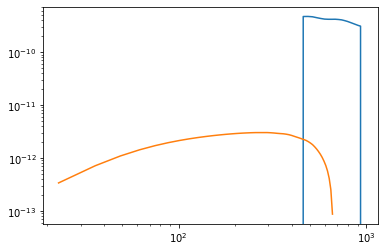

In [21]:
%%time
pk2cl._CgE(g_l1, g_s1, 100, model='nonlin', plot=True, plot_xlog=True)

CPU times: user 28.8 ms, sys: 756 µs, total: 29.5 ms
Wall time: 29.1 ms


2.761524668361312e-09

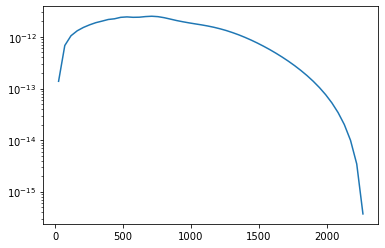

In [22]:
%%time
pk2cl._CEE(g_s1, g_s1, 100.0, model='nonlin', plot=True)

Cgg(l)                                =3.465468484561842e-05
Cgg(l)+Cg,mag(l)                      =3.471248296973003e-05
Cgg(l)+Cg,mag(l)+Cmag,g(l)            =3.477028109384164e-05
Cgg(l)+Cg,mag(l)+Cmag,g(l)+Cmag,mag(l)=3.477233504602964e-05
CPU times: user 57.1 ms, sys: 2.32 ms, total: 59.4 ms
Wall time: 58.9 ms


3.477233504602964e-05

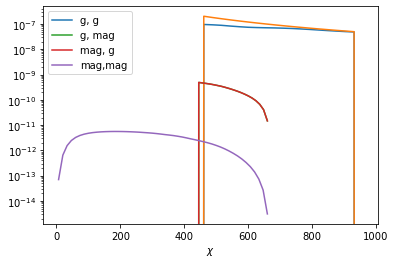

In [23]:
%%time
pk2cl._Cgg(g_l1, g_l1, 100.0, model='nonlin', plot=True)

### $C(l)$ as a function of $l$

lin:1.1213676929473877 sec
nonlin:2.7721939086914062 sec


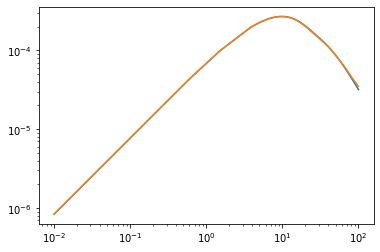

CPU times: user 4.47 s, sys: 132 ms, total: 4.6 s
Wall time: 4.6 s


In [24]:
%%time
l = np.logspace(-2, 2.0, 100)

plt.figure()
with hsc3x2pt.Time(message='lin'):
    clgg = pk2cl.Cgg('lowz', 'lowz', l, model='lin')
plt.loglog(l, clgg)
with hsc3x2pt.Time(message='nonlin'):
    clgg = pk2cl.Cgg('lowz', 'lowz', l, model='nonlin', plot=False)
plt.loglog(l, clgg)
plt.show()

lin:0.5531671047210693 sec
lin:1.6137444972991943 sec


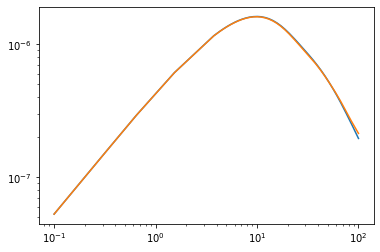

CPU times: user 2.59 s, sys: 105 ms, total: 2.7 s
Wall time: 2.69 s


In [25]:
%%time
l = np.logspace(-1, 2, 1000)

plt.figure()
with hsc3x2pt.Time(message='lin'):
    clgE = pk2cl.CgE('lowz', 's12', l, model='lin')
plt.loglog(l, clgE)
with hsc3x2pt.Time(message='lin'):
    clgE = pk2cl.CgE('lowz', 's12', l, model='nonlin')
plt.loglog(l, clgE)
plt.show()

lin:0.23492813110351562 sec
lin:0.8860979080200195 sec


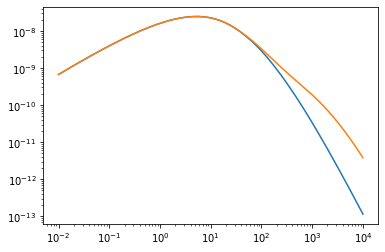

CPU times: user 1.91 s, sys: 219 ms, total: 2.13 s
Wall time: 2.13 s


In [26]:
%%time
l = np.logspace(-2, 4, 1000)

plt.figure()
t0 = time.time()
with hsc3x2pt.Time(message='lin'):
    clEE = pk2cl.CEE('s12', 's12', l, model='lin')
plt.loglog(l, clEE)
with hsc3x2pt.Time(message='lin'):
    clEE = pk2cl.CEE('s12', 's12', l, model='nonlin')
plt.loglog(l, clEE)
plt.show()

### compute all the $C(l)$

In [27]:
%%time
l = np.logspace(-2, 5, 1000)
pk2cl.compute_all_Cl(l)

CPU times: user 22.6 s, sys: 17 ms, total: 22.6 s
Wall time: 22.6 s


In [72]:
pk2cl.dump_Cl_cache('test_cl', overwrite=True)

saving cmass2,cmass2 to test_cl/cmass2,cmass2.txt
saving lowz,lowz to test_cl/lowz,lowz.txt
saving lowz,cmass1 to test_cl/lowz,cmass1.txt
saving cmass1,cmass1 to test_cl/cmass1,cmass1.txt
saving s12,s12 to test_cl/s12,s12.txt
saving s12,lowz to test_cl/s12,lowz.txt
saving cmass1,s12 to test_cl/cmass1,s12.txt
saving cmass2,lowz to test_cl/cmass2,lowz.txt
saving s12,cmass2 to test_cl/s12,cmass2.txt
saving cmass2,s12 to test_cl/cmass2,s12.txt
saving s12,cmass1 to test_cl/s12,cmass1.txt
saving cmass1,cmass2 to test_cl/cmass1,cmass2.txt
saving lowz,s12 to test_cl/lowz,s12.txt
saving lowz,cmass2 to test_cl/lowz,cmass2.txt
saving cmass1,lowz to test_cl/cmass1,lowz.txt
saving cmass2,cmass1 to test_cl/cmass2,cmass1.txt
saving l to test_cl/l.txt
saving cosmo_dict to test_cl/cosmo_dict.json.
saved galaxy sample lowz to galaxy_sample_lowz.json
saved galaxy sample cmass1 to galaxy_sample_cmass1.json
saved galaxy sample cmass2 to galaxy_sample_cmass2.json
saved galaxy sample s12 to galaxy_sample_s12

In [75]:
pk2cl.load_Cl_cache('test_cl')

Note: Sample name cmass2 is already used.
Previously registered sample is replaced.
Note: Sample name cmass1 is already used.
Previously registered sample is replaced.
Note: Sample name lowz is already used.
Previously registered sample is replaced.
Note: Sample name s12 is already used.
Previously registered sample is replaced.


### Fourier-back transformation of signals

These functions need validation with brute-force method.

brute force:0.0541839599609375 sec
-5.536273882792816 0.5637261172071844


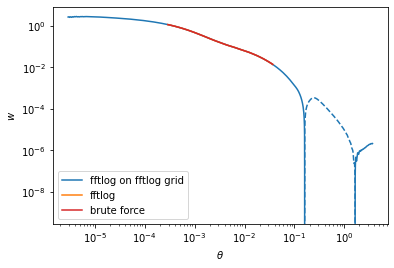

fftlog:0.6658527851104736 sec


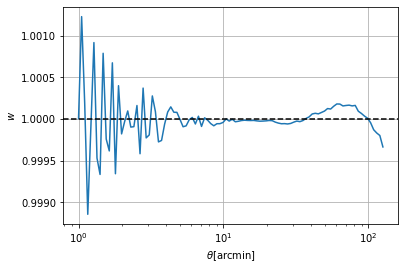

In [30]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans1 = pk2cl.angular_correlation_function_bruteforce('lowz', 'lowz', t, 'w')
with hsc3x2pt.Time(message='fftlog'):
    ans2 = pk2cl.angular_correlation_function_fftlog('lowz', 'lowz', t, 'w', plot=True, 
                                                    plot_with=[{'xy':[t,ans1],'c':'C3','label':'brute force'}])
plt.figure()
plt.semilogx(t/hsc3x2pt.arcmin2rad, ans2/ans1)
plt.grid()
plt.axhline(1.0, color='k', linestyle='--')
plt.xlabel(r'$\theta$[arcmin]')
plt.ylabel(r'$w$')
plt.show()

brute force:0.0982813835144043 sec
-5.536273882792816 0.5637261172071844


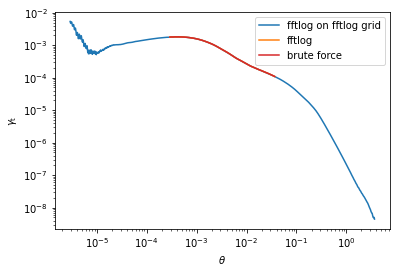

fftlog:0.9063858985900879 sec


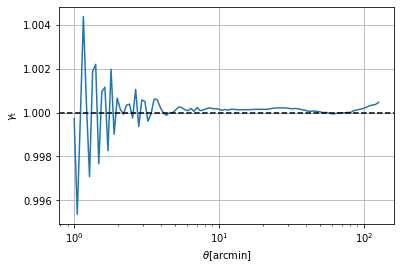

In [31]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans1 = pk2cl.angular_correlation_function_bruteforce('lowz', 's12', t, 'gamma_t')
with hsc3x2pt.Time(message='fftlog'):
    ans2 = pk2cl.angular_correlation_function_fftlog('lowz', 's12', t, 'gamma_t', plot=True, 
                                                    plot_with=[{'xy':[t,ans1],'c':'C3','label':'brute force'}])
plt.figure()
plt.semilogx(t/hsc3x2pt.arcmin2rad, ans2/ans1)
plt.grid()
plt.axhline(1.0, color='k', linestyle='--')
plt.xlabel(r'$\theta$[arcmin]')
plt.ylabel(r'$\gamma_\mathrm{t}$')
plt.show()

brute force:0.054685354232788086 sec
-5.536273882792816 0.5637261172071844


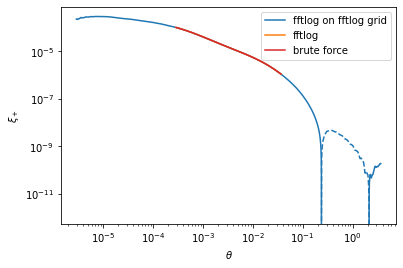

fftlog:0.7344920635223389 sec


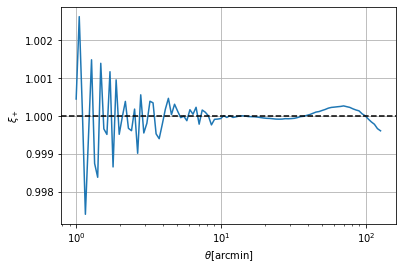

In [32]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans1 = pk2cl.angular_correlation_function_bruteforce('s12', 's12', t, 'xi+')
with hsc3x2pt.Time(message='fftlog'):
    ans2 = pk2cl.angular_correlation_function_fftlog('s12', 's12', t, 'xi+', plot=True, 
                                                    plot_with=[{'xy':[t,ans1],'c':'C3','label':'brute force'}])
plt.figure()
plt.semilogx(t/hsc3x2pt.arcmin2rad, ans2/ans1)
plt.grid()
plt.axhline(1.0, color='k', linestyle='--')
plt.xlabel(r'$\theta$[arcmin]')
plt.ylabel(r'$\xi_+$')
plt.show()

brute force:0.09306907653808594 sec
-5.536273882792816 0.5637261172071844


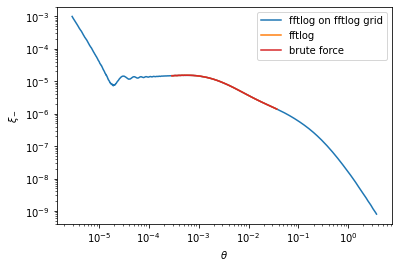

fftlog:0.9850313663482666 sec


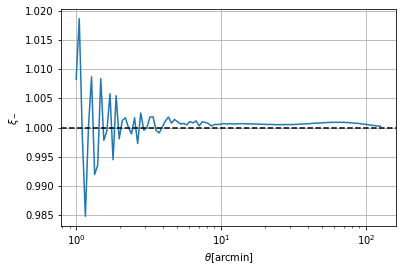

In [33]:
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
with hsc3x2pt.Time(message='brute force'):
    ans1 = pk2cl.angular_correlation_function_bruteforce('s12', 's12', t, 'xi-')
with hsc3x2pt.Time(message='fftlog'):
    ans2 = pk2cl.angular_correlation_function_fftlog('s12', 's12', t, 'xi-', plot=True, 
                                                    plot_with=[{'xy':[t,ans1],'c':'C3','label':'brute force'}])
    
plt.figure()
plt.semilogx(t/hsc3x2pt.arcmin2rad, ans2/ans1)
plt.grid()
plt.axhline(1.0, color='k', linestyle='--')
plt.xlabel(r'$\theta$[arcmin]')
plt.ylabel(r'$\xi_-$')
plt.show()

### covariance matrices

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


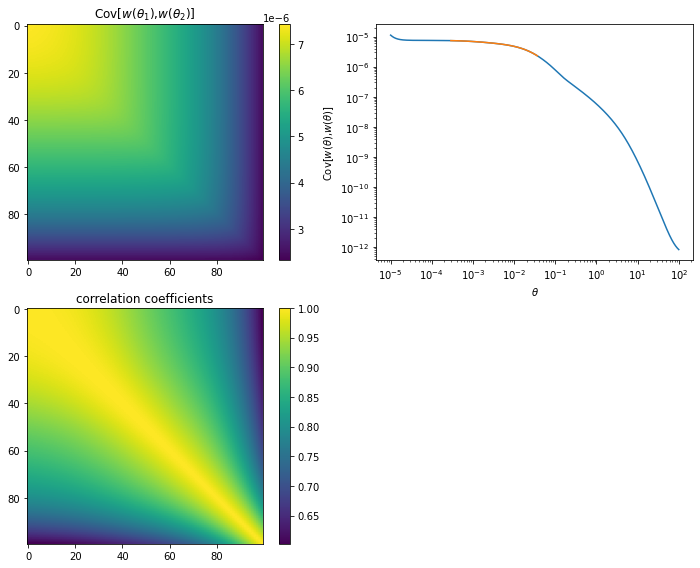

CPU times: user 1.39 s, sys: 381 ms, total: 1.77 s
Wall time: 1.88 s


In [34]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['lowz','lowz'], 'w', t, ['lowz','lowz'], 'w', t, binave=True, plot=True)

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


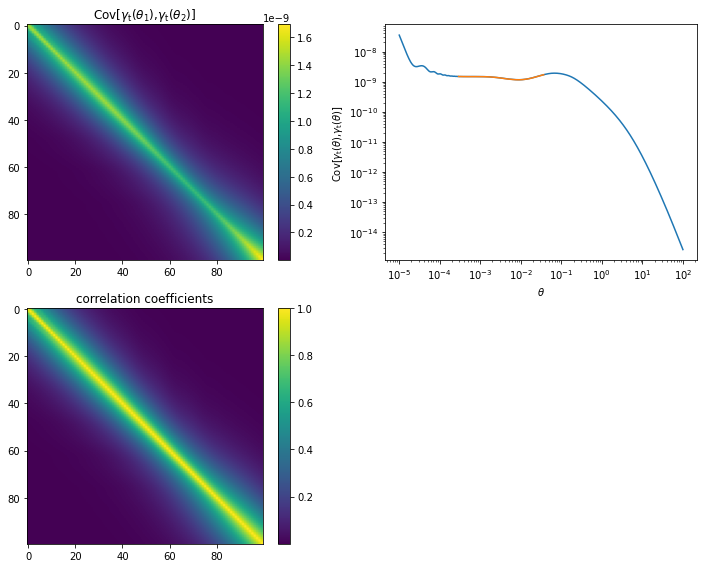

CPU times: user 1.41 s, sys: 389 ms, total: 1.8 s
Wall time: 1.8 s


In [35]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['lowz','s12'], 'gamma_t', t, ['lowz','s12'], 'gamma_t', t, binave=True, plot=True)

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


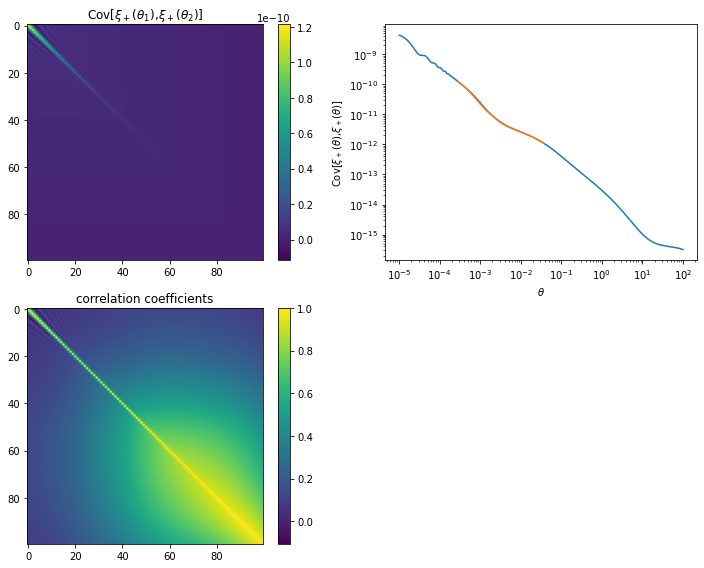

CPU times: user 1.4 s, sys: 340 ms, total: 1.74 s
Wall time: 1.73 s


In [36]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['s12','s12'], 'xi+', t, ['s12', 's12'], 'xi+', t, binave=True, plot=True)

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


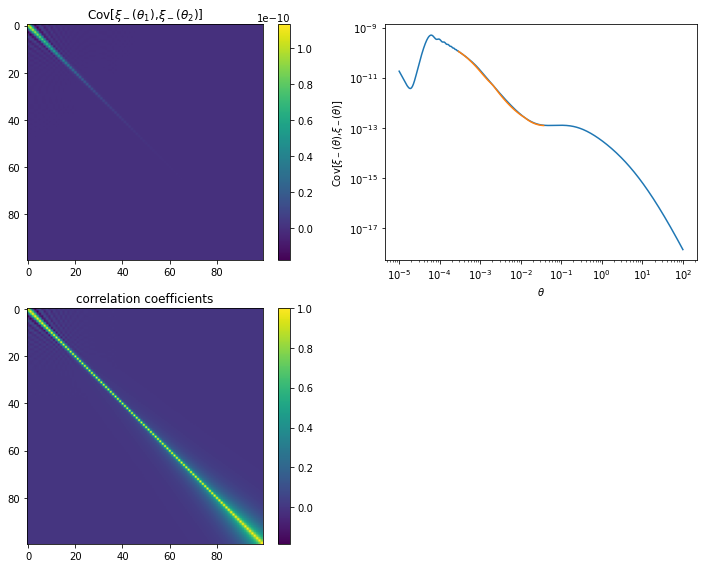

CPU times: user 1.09 s, sys: 313 ms, total: 1.4 s
Wall time: 1.4 s


In [37]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_fftlog(['s12','s12'], 'xi-', t, ['s12', 's12'], 'xi-', t, binave=True, plot=True)

## brute force

0.04884271409381313 0.04884271409381313


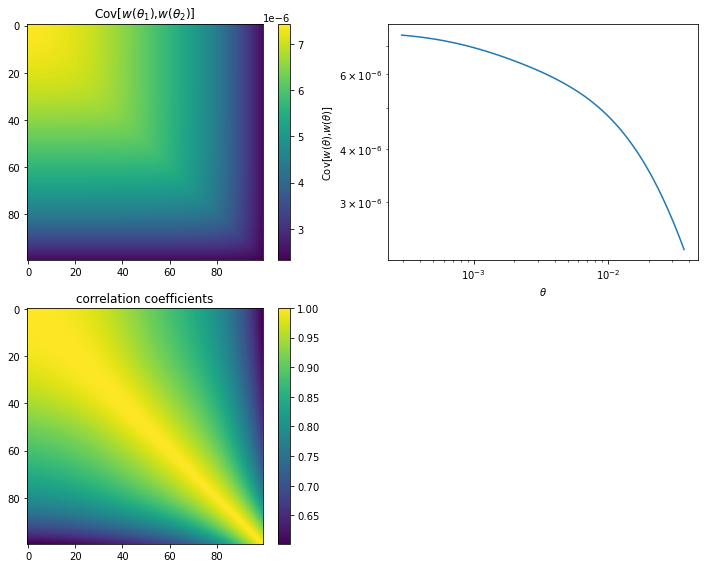

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


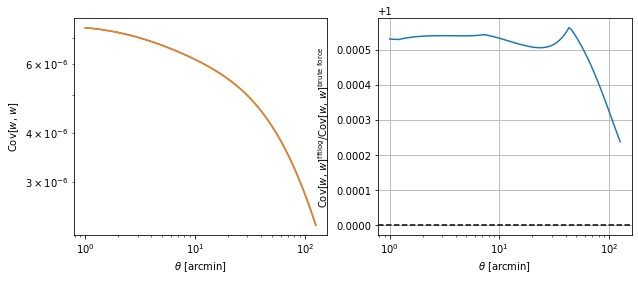

CPU times: user 44.1 s, sys: 375 ms, total: 44.5 s
Wall time: 44.5 s


In [38]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_bruteforce(['lowz','lowz'], 'w', t, ['lowz', 'lowz'], 'w', t, binave=True, plot=True)

# check
cov_fftlog = pk2cl.covariance_fftlog(['lowz','lowz'], 'w', t, ['lowz','lowz'], 'w', t, binave=True, plot=False)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog))
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov))
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$w$, $w$]')

ax = fig.add_subplot(1,2,2)
ax.semilogx(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog)/np.diag(cov))
ax.grid()
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$w$, $w$]${}^\mathrm{fftlog}$/Cov[$w$, $w$]${}^\mathrm{brute~force}$')
ax.axhline(1.0, color='k', linestyle='--')
plt.show()

0.04884271409381313 0.04884271409381313


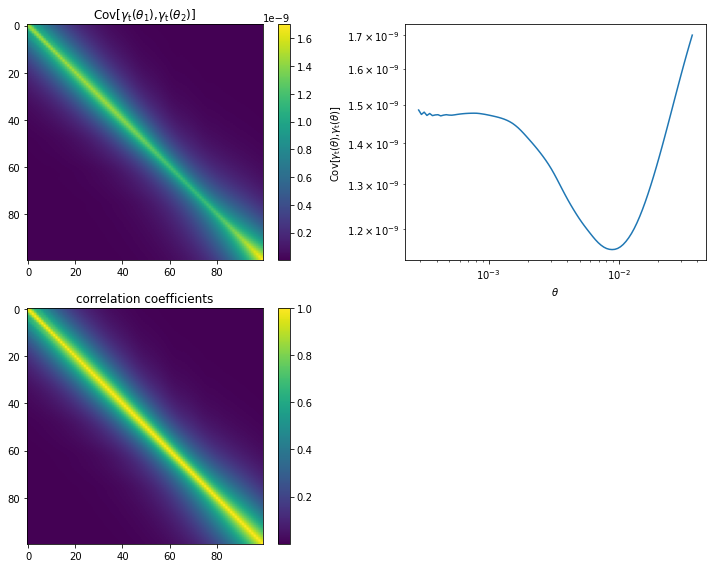

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


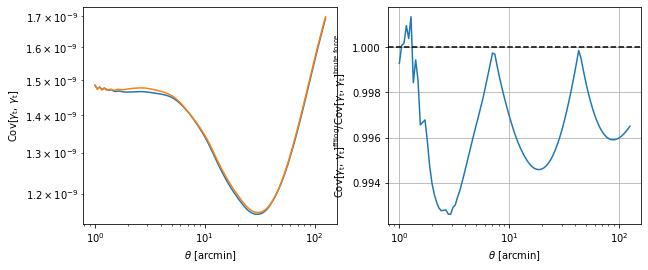

CPU times: user 58 s, sys: 462 ms, total: 58.5 s
Wall time: 58.5 s


In [39]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_bruteforce(['lowz','s12'], 'gamma_t', t, ['lowz','s12'], 'gamma_t', t, binave=True, plot=True)

# check
cov_fftlog = pk2cl.covariance_fftlog(['lowz','s12'], 'gamma_t', t, ['lowz','s12'], 'gamma_t', t, binave=True, plot=False)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog))
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov))
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\gamma_\mathrm{t}$, $\gamma_\mathrm{t}$]')

ax = fig.add_subplot(1,2,2)
ax.semilogx(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog)/np.diag(cov))
ax.grid()
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\gamma_\mathrm{t}$, $\gamma_\mathrm{t}$]${}^\mathrm{fftlog}$/Cov[$\gamma_\mathrm{t}$, $\gamma_\mathrm{t}$]${}^\mathrm{brute~force}$')
ax.axhline(1.0, color='k', linestyle='--')
plt.show()

0.04884271409381313 0.04884271409381313


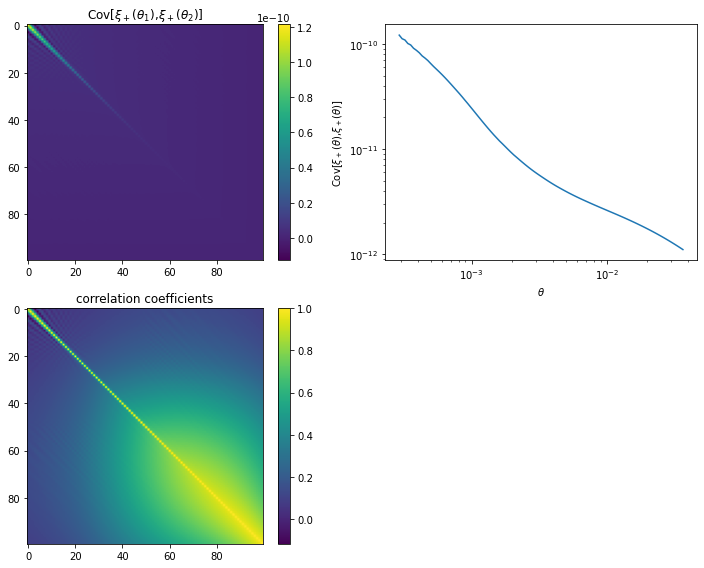

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


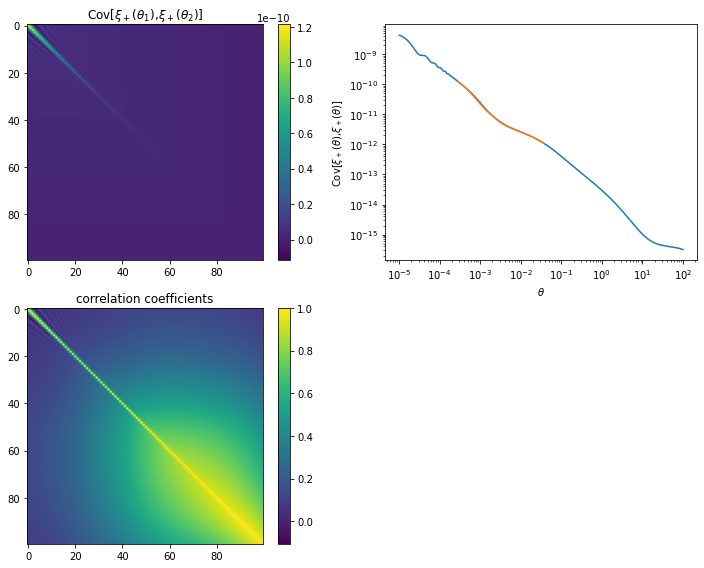

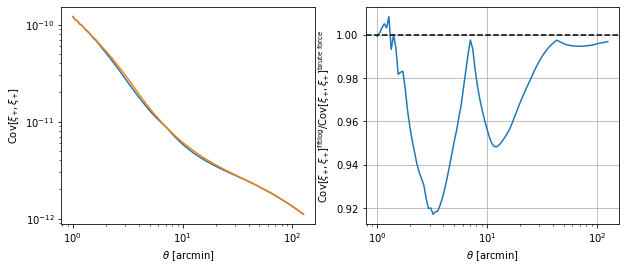

CPU times: user 45.6 s, sys: 720 ms, total: 46.3 s
Wall time: 46.3 s


In [40]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_bruteforce(['s12','s12'], 'xi+', t, ['s12', 's12'], 'xi+', t, binave=True, plot=True)

# check
cov_fftlog = pk2cl.covariance_fftlog(['s12','s12'], 'xi+', t, ['s12', 's12'], 'xi+', t, binave=True, plot=True)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog))
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov))
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\xi_{+}, \xi_{+}$]')

ax = fig.add_subplot(1,2,2)
ax.semilogx(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog)/np.diag(cov))
ax.grid()
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\xi_{+}, \xi_{+}$]${}^\mathrm{fftlog}$/Cov[$\xi_{+}, \xi_{+}$]${}^\mathrm{brute~force}$')
ax.axhline(1.0, color='k', linestyle='--')
plt.show()

0.04884271409381313 0.04884271409381313


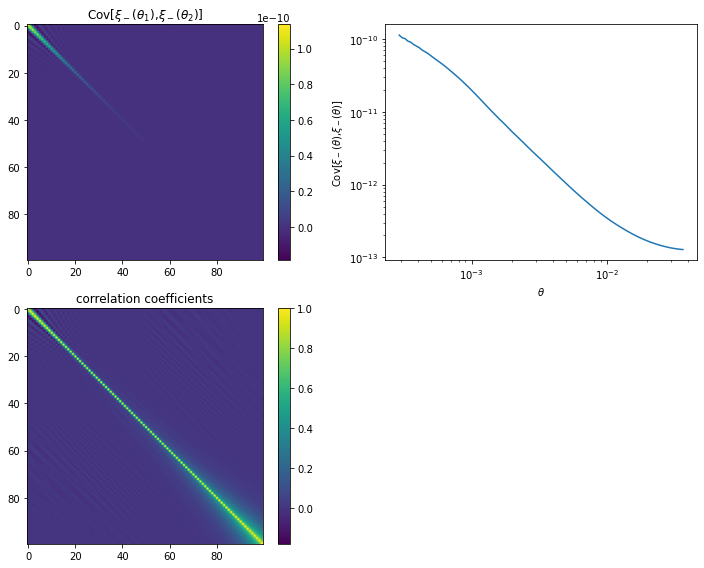

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


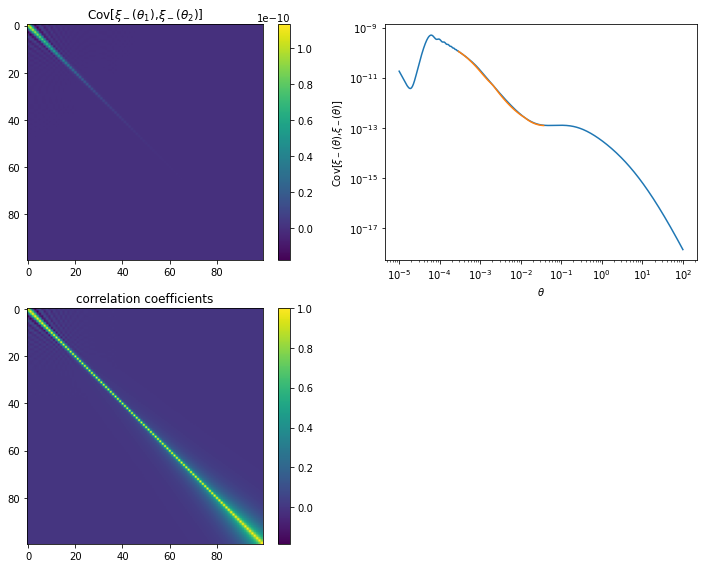

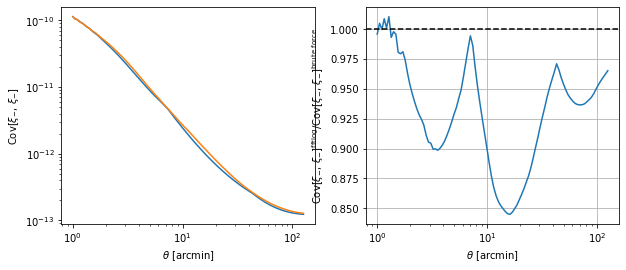

CPU times: user 1min 14s, sys: 705 ms, total: 1min 15s
Wall time: 1min 15s


In [41]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_bruteforce(['s12','s12'], 'xi-', t, ['s12', 's12'], 'xi-', t, binave=True, plot=True)

# check
cov_fftlog = pk2cl.covariance_fftlog(['s12','s12'], 'xi-', t, ['s12', 's12'], 'xi-', t, binave=True, plot=True)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog))
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov))
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\xi_{-}$, $\xi_{-}$]')

ax = fig.add_subplot(1,2,2)
ax.semilogx(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog)/np.diag(cov))
ax.grid()
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\xi_{-}$, $\xi_{-}$]${}^\mathrm{fftlog}$/Cov[$\xi_{-}$, $\xi_{-}$]${}^\mathrm{brute~force}$')
ax.axhline(1.0, color='k', linestyle='--')
plt.show()

0.04884271409381313 0.04884271409381313


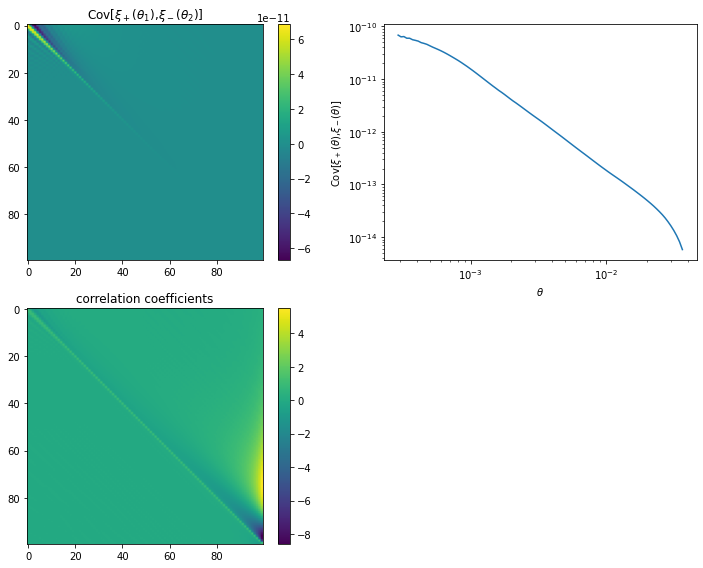

1000 1000
(1000, 1000)
1000 1000
0.04884271409381313 0.04884271409381313


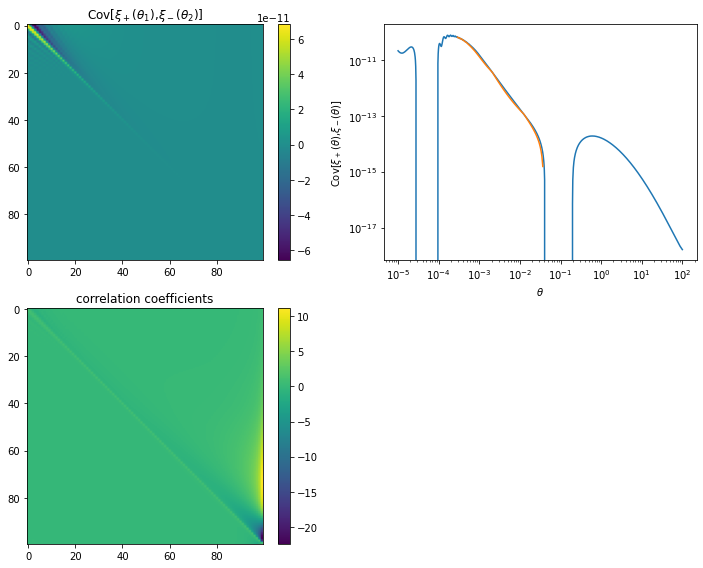

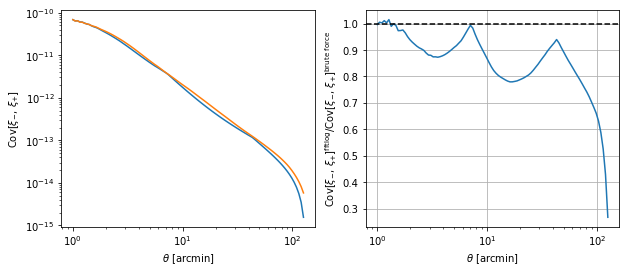

CPU times: user 1min, sys: 756 ms, total: 1min
Wall time: 1min


In [42]:
%%time
t = np.logspace(0, 2.1, 100) * hsc3x2pt.arcmin2rad
cov = pk2cl.covariance_bruteforce(['s12','s12'], 'xi+', t, ['s12', 's12'], 'xi-', t, binave=True, plot=True)

# check
cov_fftlog = pk2cl.covariance_fftlog(['s12','s12'], 'xi+', t, ['s12', 's12'], 'xi-', t, binave=True, plot=True)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog))
ax.loglog(t / hsc3x2pt.arcmin2rad, np.diag(cov))
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\xi_{-}$, $\xi_{+}$]')

ax = fig.add_subplot(1,2,2)
ax.semilogx(t / hsc3x2pt.arcmin2rad, np.diag(cov_fftlog)/np.diag(cov))
ax.grid()
ax.set_xlabel(r'$\theta$ [arcmin]')
ax.set_ylabel(r'Cov[$\xi_{-}$, $\xi_{+}$]${}^\mathrm{fftlog}$/Cov[$\xi_{-}$, $\xi_{+}$]${}^\mathrm{brute~force}$')
ax.axhline(1.0, color='k', linestyle='--')
plt.show()

### signal and variance (visual check)

-5.536273882792816 0.5637261172071844
1000 1000
(1000, 1000)
1000 1000
0.1667389205271551 0.1667389205271551


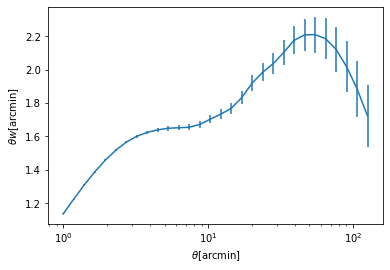

In [43]:
t = np.logspace(0, 2.1, 30) * hsc3x2pt.arcmin2rad
signal = pk2cl.angular_correlation_function_fftlog('lowz', 'lowz', t, 'w')
cov = pk2cl.covariance_fftlog(['lowz','lowz'], 'w', t, ['lowz','lowz'], 'w', t, binave=True)

t_arcmin = t/hsc3x2pt.arcmin2rad
plt.figure()
plt.xlabel(r'$\theta$[arcmin]')
plt.ylabel(r'$\theta w$[arcmin]')
plt.xscale('log')
plt.errorbar(t_arcmin, t_arcmin*signal, t_arcmin*np.diag(cov)**0.5)
plt.show()

-5.536273882792816 0.5637261172071844
1000 1000
(1000, 1000)
1000 1000
0.1667389205271551 0.1667389205271551


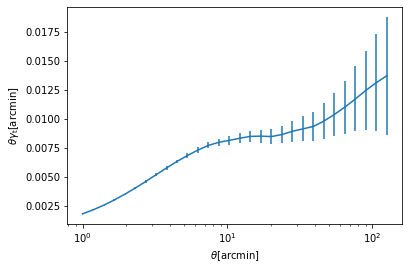

In [44]:
t = np.logspace(0, 2.1, 30) * hsc3x2pt.arcmin2rad
signal = pk2cl.angular_correlation_function_fftlog('lowz', 's12', t, 'gamma_t')
cov = pk2cl.covariance_fftlog(['lowz','s12'], 'gamma_t', t, ['lowz','s12'], 'gamma_t', t, binave=True)

t_arcmin = t/hsc3x2pt.arcmin2rad
plt.figure()
plt.xlabel(r'$\theta$[arcmin]')
plt.ylabel(r'$\theta \gamma_\mathrm{t}$[arcmin]')
plt.xscale('log')
plt.errorbar(t_arcmin, t_arcmin*signal, t_arcmin*np.diag(cov)**0.5)
plt.show()

In [48]:
g_l1.info

OrderedDict([('sample_name', 'lowz'),
             ('z_lens', 0.251),
             ('z_min', 0.15),
             ('z_max', 0.35),
             ('galaxy_bias', 1.78),
             ('n2d', '40.36 arcmin^-2'),
             ('alpha_mag', 2.259)])

In [49]:
import json

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [53]:
g_l1.dump('./')

saved galaxy sample lowz to lowz.json


In [55]:
json.load(open('lowz.json', 'r'), object_pairs_hook=hsc3x2pt.od)

OrderedDict([('sample_name', 'lowz'),
             ('z_lens', 0.251),
             ('z_min', 0.15),
             ('z_max', 0.35),
             ('galaxy_bias', 1.78),
             ('n2d', '40.36 arcmin^-2'),
             ('alpha_mag', 2.259)])

In [57]:
pk2cl.cosmo_dict

{'omega_b': 0.02225,
 'omega_c': 0.1198,
 'Omega_de': 0.6844,
 'ln10p10As': 3.094,
 'n_s': 0.9645,
 'w_de': -1.0,
 'Omega_de0': 0.6844,
 'Omega_K0': 0.0,
 'w0': -1.0,
 'wa': 0.0,
 'h': 0.6724008777737618}

In [59]:
pk2cl.galaxy_sample_dict.items()

odict_items([('lowz', <hsc3x2pt.galaxy_sample_lens_class object at 0x2aff105e74c0>), ('cmass1', <hsc3x2pt.galaxy_sample_lens_class object at 0x2aff107aae80>), ('cmass2', <hsc3x2pt.galaxy_sample_lens_class object at 0x2aff103b8fd0>), ('s12', <hsc3x2pt.galaxy_sample_source_class object at 0x2aff107b3e20>)])

In [61]:
a = {'a':0, 'b':1}

In [62]:
a.pop('a')

0

In [63]:
a

{'b': 1}